In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

n_points = 500
X = np.array(np.linspace(0, 10, n_points))
Y = np.array(0.2 * X + 0.17) + np.random.normal(0, .1, n_points)

In [2]:
df = pd.DataFrame({"X" : X, "Y" :Y}).sample(frac=1)
X, Y = df.X.values, df.Y.values

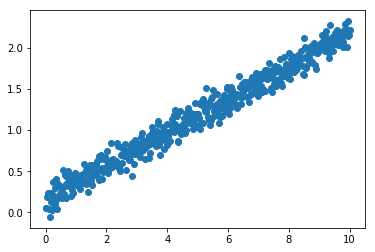

In [3]:
plt.scatter(X, Y)

#### Stochastic Gradient Descent

In [4]:
def sgd(X, Y, eta=0.0001, epoch=10):
    # Assume Y_hat = w1 * x + w0
    # cost: (w1 * x + w0 - Y) ^ 2
    # gradient for dw1: 2 * d(Y_hat - Y) / dw1 = 2 * (w1 * x + w0 - Y) * x, 
    # gradient for dw0: 2 * d(Y_hat - Y) / dw0 = 2 * (w1 * x + w0 - Y)
    
    w1, w0 = 0, 0
    cost = []
    # update
    for i in range(epoch):
        for x, y in zip(X, Y):
            dw1 = 2 * (w1 * x + w0 - y) * x
            dw0 = 2 * (w1 * x + w0 - y)

            w1 = w1 - eta * dw1
            w0 = w0 - eta * dw0
        
            cost.append((w1 * x + w0 - y) ** 2)
            
    print("trained %i epochs, w1 = %.2f, w0 = %.2f"%(i, w1, w0))
    return w1, w0, cost

w1, w0, cost = sgd(X, Y)

trained 9 epochs, w1 = 0.22, w0 = 0.06


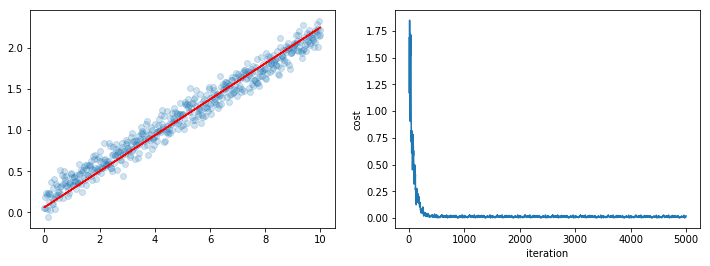

In [5]:
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.scatter(X, Y, alpha=0.2)
plt.plot(X, w1 * X + w0, color="r")

plt.subplot(122)
plt.plot(pd.DataFrame(cost).rolling(10).mean())
plt.xlabel("iteration")
plt.ylabel("cost")
plt.show()

#### Batch Gradient Descent

In [6]:
def batch(X, Y, eta=0.00015, epoch=1000):
    # Assume Y_hat = w1 * x + w0
    # cost: (w1 * x + w0 - Y) ^ 2
    # gradient for dw1: 2 * d(Y_hat - Y) / dw1 = 2 * (w1 * x + w0 - Y) * x, 
    # gradient for dw0: 2 * d(Y_hat - Y) / dw0 = 2 * (w1 * x + w0 - Y)
    
    w1, w0 = 0, 0
    cost = []
    # update
    for i in range(epoch):
        dw1 = np.average(2 * (w1 * X + w0 - Y) * X)
        dw0 = np.average(2 * (w1 * X + w0 - Y))

        w1 = w1 - eta * dw1
        w0 = w0 - eta * dw0
        
        cost.append(np.average((w1 * X + w0 - X) ** 2))
    print("trained %i epochs, w1 = %.2f, w0 = %.2f"%(i, w1, w0))
    return w1, w0, cost

w1, w0, cost = batch(X, Y)

trained 999 epochs, w1 = 0.22, w0 = 0.04


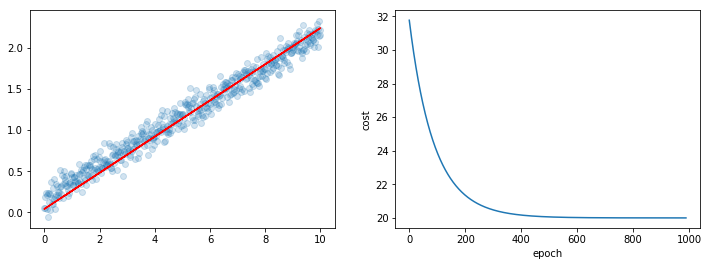

In [7]:
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.scatter(X, Y, alpha=0.2)
plt.plot(X, w1 * X + w0, color="r")

plt.subplot(122)
plt.plot(range(len(cost[10:])), cost[10:])
plt.xlabel("epoch")
plt.ylabel("cost")
plt.show()

#### Mini-batch Gradient Descent

In [8]:
def minibatch(X, Y, eta=0.00015, epoch=1000, batch_size=50):
    # Assume Y_hat = w1 * x + w0
    # cost: (w1 * x + w0 - Y) ^ 2
    # gradient for dw1: 2 * d(Y_hat - Y) / dw1 = 2 * (w1 * x + w0 - Y) * x, 
    # gradient for dw0: 2 * d(Y_hat - Y) / dw0 = 2 * (w1 * x + w0 - Y)
    
    w1, w0 = 0, 0
    cost = []
    
    m = len(X)
    n_batch = int(np.ceil(m // batch_size))
    
    # update
    for i in range(epoch):
        for b in range(n_batch):
            s, e = b * batch_size, min((b + 1) * batch_size, m)
            X_b = X[s:e]
            Y_b = Y[s:e]
            
        dw1 = np.average(2 * (w1 * X_b + w0 - Y_b) * X_b)
        dw0 = np.average(2 * (w1 * X_b + w0 - Y_b))

        w1 = w1 - eta * dw1
        w0 = w0 - eta * dw0
        
        cost.append(np.average((w1 * X + w0 - X) ** 2))
    print("trained %i epochs, w1 = %.2f, w0 = %.2f"%(i, w1, w0))
    return w1, w0, cost

w1, w0, cost = minibatch(X, Y)

trained 999 epochs, w1 = 0.23, w0 = 0.05


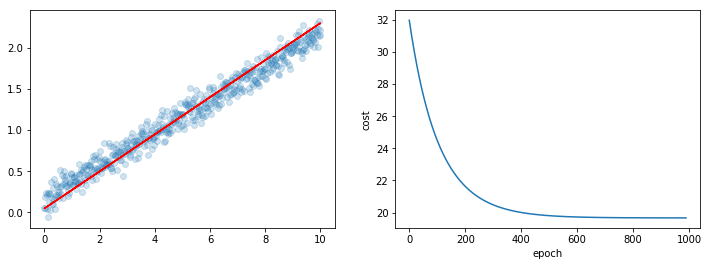

In [9]:
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.scatter(X, Y, alpha=0.2)
plt.plot(X, w1 * X + w0, color="r")

plt.subplot(122)
plt.plot(range(len(cost[10:])), cost[10:])
plt.xlabel("epoch")
plt.ylabel("cost")
plt.show()

#### Normal Equation

In [10]:
X_design = np.concatenate([np.ones((len(X), 1)), np.asmatrix(X).T], axis=1)

In [11]:
beta = (X_design.T.dot(X_design)) ** -1 * X_design.T * np.asmatrix(Y).T
beta

matrix([[0.16895166],
        [0.20045746]])

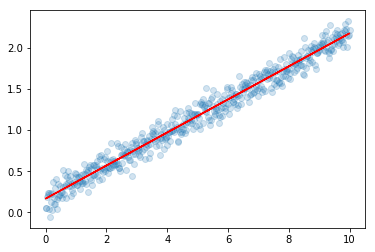

In [12]:
plt.scatter(X, Y, alpha=0.2)
plt.plot(X, X_design * beta, color="r")